In [1]:
# word embedding for korean
import collections
import string
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')
matplotlib.rc('font',family='NanumGothic')

print ("package loaded")

package loaded


In [2]:
def pprint(list_text):
    pstr = "[" + ','.join(list_text) + "]"
    print pstr

In [4]:
# Load corpus
f_corp= open('testtxt/drill_man.txt')
content = f_corp.read()

exclude = set(string.punctuation)
content_punc_removed = ''.join(ch for ch in content if ch not in exclude)
sentences = content_punc_removed.split('\n')

print ("number of origin lines : " + str(len(sentences)))

number of origin lines : 895


In [5]:
# list of all words
words = " ".join(sentences).split()
print ("size of words : " +  str(len(words)))

size of words : 33716


In [6]:
pprint(words)

[대학,문예창작과,특강을,위해,대전에,내려간,건,일주일,전,일이었다,구월,초순인데,어째,한여름보다,날이,찌는,듯했다,중부,고속도로를,달려서,경기도,일죽쯤,갔을,때부터,자동차,에어컨은,기력이,다해서,아무리,세게,틀어도,미지근한,바람만,내뿜기,시작했다,게다가,전날,밤에,늦도록,마신,술,때문에,여느,땐,만만하게,여겼던,거리의,여행이,그렇게,고될,수,없었다,어쨌든,시간이라는,건,시계를,거꾸로,매달거나,서랍에,넣고,자물쇠를,채워도,제꺽제꺽,흘러가게,마련이어서,이를,악물고,버틴,결과,핸들에,얼굴을,묻고,졸도하는,일,없이,무사히,대전에,도착할,수,있었다,특강을,시작할,때까지는,아직,시간이,남아,있었다,국물이,시원한,음식을,먹으면,속이,좀,풀릴,것,같아서,차에서,내려,교문을,지나,언덕을,넘었다,왼쪽,어느,식당,유리창에,내가,찾던,음식,이름이,적혀,있었다,콩나물,해장국,그,집엔,대여섯,사람이,모여앉아서,밥,대신에,한담을,나누고,있었다,주인,여자를,집사님,하고,부르는,걸로,봐서,지나는,길에,잠깐,들른,교인들이었다,머리에,포마드를,잔뜩,발라,가르마를,탄,사내는,전도사였다,교인,가운데,그런,머리,모양에,흰색,와이셔츠를,입은,자는,전도사일,가능성이,크다고,보는,게,내,오랜,고정관념이었다,어렸을,때,나도,노랗고,파란,물감을,들인,달걀과,갖가지,과자를,얻어먹는,재미에,부활절과,성탄절을,앞뒤로,해서,교회에,들락거린,적이,있었다,밥집에서,한담을,이끌고,있는,사내는,그,시절의,유년,주일학교,전도사와,생김새뿐,아니라,말투까지,판에,박은,듯했다,말하는,중간,중간에,앞에,놓인,성경책에,눈길을,주며,건성으로,몇,장,넘겼다가,덮는,동작까지도,밥을,시키긴,했으나,그냥,그,집을,나가버릴까,하는,생각이,들었다,선풍기가,삐걱,소리를,내며,용쓰는,것과,상관,없이,바깥보다,후텁지근한,공기,탓만은,아니었다,전도사는,두,손을,방바닥에,짚고,뒤로,한껏,상체를,젖혀,벽에,등을,대고,앉은,자세였다,잔뜩,거드름피우는,느린,목소리로,그는,어떤,소년에게,훈계를,늘어놓고,있었다,사람마다,다,사주팔자가,있는,거야,너는,네,어머니

In [7]:
# count words
count = collections.Counter(words).most_common()
print ("count list size : " + str(len(count)))
print ("Top 5 words are below")
for tup in count[:5]:
    print(str(tup[0]) + ":" + str(tup[1]))

count list size : 14736
Top 5 words are below
그:286
나는:239
한:201
여자는:195
있었다:141


In [8]:
# make dictionary
rdic = [i[0] for i in count]
dic = {w : i for i, w in enumerate(rdic)}
dic_size = len(dic)
print ('dictionary size : ' + str(dic_size))

dictionary size : 14736


In [9]:
pprint (rdic)

[그,나는,한,여자는,있었다,여자가,두,수,내가,걸,이,하고,삼촌은,내,어느,건,있다,있는,다시,게,때,저는,다른,없었다,여자를,고개를,곽은,여자의,하는,뒤에,몇,손을,일을,일이,그는,벽을,나를,것,다,눈을,어떤,동안,여자와,같은,날,그녀는,자기,않았다,집,없이,이런,안,얼굴로,집을,잘,자신의,년,하지만,삼촌이,그런,순간,했다,모든,일,그리고,계속,그날,앉아,전에,같이,사람이,들고,그때,집에,길을,살,앞으로,향해,눈에,된,몸을,얘기를,없는,무슨,그러나,발을,소리가,아니라,얼굴을,그녀가,소리를,여자,않은,문을,사내는,시작했다,사내가,전혀,저,삼촌의,때문에,역시,더,바로,지금,느낌이,사람,대한,벽에,사이에,대로,속으로,당신은,채,않고,자신이,위에,위로,후에,않는,바람에,지난,나한테,앉아서,얼마,차를,자리에서,많이,집으로,이미,알고,들어,있었습니다,앞에,우리,지,중에,형은,앞에서,여러,방에서,먼저,어떻게,그렇게,속에,우리는,가운데,보였다,아이가,입을,아이의,일은,방으로,형의,잠시,여선생의,아이를,그의,사람은,그런데,적이,아내는,제가,것이다,뒤로,곧,여선생은,손은,하나,온,되는,잠깐,서,그가,나와,그녀의,그대로,집에서,있다는,가서,쪽으로,별안간,할,또,갑자기,창,나,속에서,데,곽이,그래서,번,말했다,모두,있을,통과하는,보고,형이,사나이는,되었다,깊이,아직,어서,물,방,벽,듯이,바닥에,길게,아내와,좀,물었다,될,저의,들었다,아무,본,서로,여자에게,당신,가지,듯한,사람의,하나가,여선생이,목소리로,여느,이는,저수지,듯했다,갖고,어제,내며,한번,같았다,알,만에,그러자,거야,것처럼,해가,지나서,자리를,이렇게,돼,오늘,눈길을,땐,반,나의,여자한테,잡고,그녀와,그게,볼,아,방을,시간을,쓴,날이,불을,해도,아이는,표정을,몸이,누군가,폭로증,마치,모두가,통해,년이,건지,이후로,자리에,당신을,먹고,줄곧,음식을,큰,거예요,늘,있던,못했다,모습을,앉은,아니었다,겁니다,때는,머리를,숨을,없어요,손이,계단을,시간,사람을,든,곧바로,보이는,소설을,등을,솜다리는,짐가방을,않을,통해서,최가,길에,

In [11]:
data = [dic[word] for word in words]
print ("size of data : " + str(len(data)))
print ("sample data : " + str(data[:10]))

size of data : 33716
sample data : [782, 9002, 3914, 1046, 4333, 3220, 15, 355, 1460, 420]


In [12]:
# Word embedding options
window_size = 3
embedding_size = 2
batch_size = 100
learning_rate = 0.01
negative_sample = 100
training_epoch = 10000

In [13]:
# make skip grammer pairs
skip_gram_data = []
for sentence in sentences:
    words = sentence.split()
    for i, word in enumerate(words):
        for w in range(-window_size, window_size):
            if i + w >= 0 and i + w < len(words) and w != 0 :
                skip_gram_data.append([dic[word] , dic[words[i + w]]])

print ('skip gram pairs : ' + str(skip_gram_data [:5]))

skip gram pairs : [[782, 9002], [782, 3914], [9002, 782], [9002, 3914], [9002, 1046]]


In [14]:
def random_batch(skip_gram_pairs, batch_size):
    x = []
    y = []
    r = np.random.choice(range(len(skip_gram_pairs)), batch_size, replace=False)
    for idx in r :
        x.append(skip_gram_pairs[idx][0])
        y.append([skip_gram_pairs[idx][1]])
    return x, y

print ("random batch : " + str(random_batch(skip_gram_data, 5)))

random batch : ([35, 16, 504, 4102, 1684], [[2878], [11778], [21], [13748], [1262]])


In [15]:
train_inputs = tf.placeholder(tf.int32, shape=[batch_size])
train_labels = tf.placeholder(tf.int32, shape=[batch_size, 1])

embeddings = tf.Variable(tf.random_uniform([dic_size, embedding_size], -1.0, 1.0))
embed = tf.nn.embedding_lookup(embeddings, train_inputs) # lookup table

# Construct the variables for the NCE loss
nce_weights = tf.Variable(tf.random_uniform([dic_size, embedding_size], -1.0, 1.0))
nce_biases = tf.Variable(tf.zeros([dic_size]))

# Compute the average NCE loss for the batch.
cost = tf.reduce_mean(tf.nn.nce_loss(nce_weights, nce_biases, embed, train_labels, negative_sample, dic_size))

# Use the adam optimizer
optm = tf.train.AdamOptimizer(learning_rate).minimize(cost)
init = tf.initialize_all_variables()

print ("Graph build")

Graph build


In [16]:
sess = tf.Session()
sess.run(init)

for epoch in range(training_epoch):
    batch_inputs, batch_labels = random_batch(skip_gram_data, batch_size)
    cost_val, _ = sess.run([cost, optm],feed_dict={train_inputs: batch_inputs, train_labels: batch_labels})
    if epoch % 500 == 0:
        print ("epoch: %03d/%03d  ,  cost: %.6f" % (epoch, training_epoch, cost_val))

trained_embeddings = sess.run(embeddings)
print ("Training complete")

epoch: 000/10000  ,  cost: 334.738953
epoch: 500/10000  ,  cost: 286.517944
epoch: 1000/10000  ,  cost: 175.172485
epoch: 1500/10000  ,  cost: 96.072983
epoch: 2000/10000  ,  cost: 85.301552
epoch: 2500/10000  ,  cost: 74.525688
epoch: 3000/10000  ,  cost: 43.643467
epoch: 3500/10000  ,  cost: 35.839096
epoch: 4000/10000  ,  cost: 26.546471
epoch: 4500/10000  ,  cost: 20.362551
epoch: 5000/10000  ,  cost: 46.990730
epoch: 5500/10000  ,  cost: 15.218434
epoch: 6000/10000  ,  cost: 13.075096
epoch: 6500/10000  ,  cost: 17.938730
epoch: 7000/10000  ,  cost: 8.006881
epoch: 7500/10000  ,  cost: 8.175989
epoch: 8000/10000  ,  cost: 9.172287
epoch: 8500/10000  ,  cost: 6.295805
epoch: 9000/10000  ,  cost: 9.873281
epoch: 9500/10000  ,  cost: 6.946042
Training complete


In [17]:
print (trained_embeddings.shape)

(14736, 2)


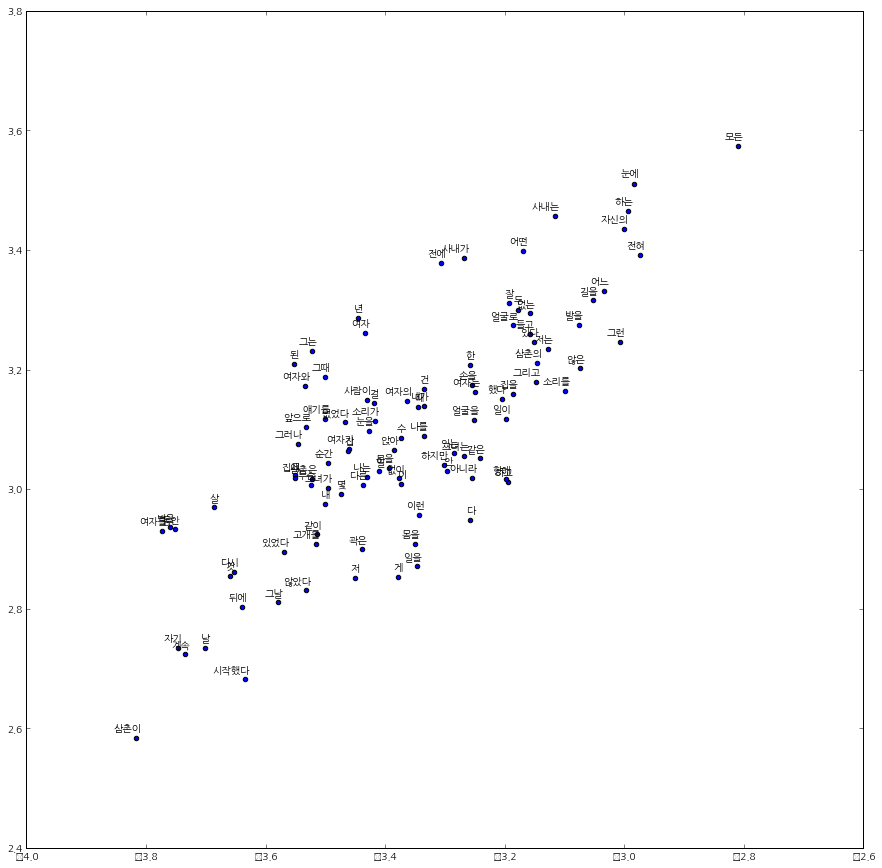

In [24]:
# Show word2vec if dim is 2
plt.figure(figsize=(15,15))
if trained_embeddings.shape[1] == 2:
    labels = rdic[:100] # Show top 100 words
    for i, label in enumerate(labels):
        x, y = trained_embeddings[i,:]
        plt.scatter(x, y)
        plt.annotate('%s' % label.decode('UTF-8'), xy=(x, y), xytext=(5, 5), textcoords='offset points', ha='right', va='bottom')
    plt.show()